In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [41]:
df = pd.read_excel('TrainExer 3-3.xlsx')

In [42]:
df.head()

,Year,Index,Dividends,Riskfree,LogEqPrem,BookMarket,NTIS,DivPrice,EarnPrice,Inflation
0,1927,17.66,0.77,0.0317,0.280823,0.374689,0.073955,-3.132667,-2.766942,-0.021176
1,1928,24.35,0.85,0.0426,0.313824,0.259667,0.042639,-3.355051,-2.870448,-0.009793
2,1929,21.45,0.97,0.0303,-0.112428,0.338458,0.165576,-3.096184,-2.589490,0.001830
3,1930,15.34,0.98,0.0148,-0.288025,0.554745,0.131525,-2.750667,-2.760923,-0.060665
4,1931,8.12,0.82,0.0241,-0.563742,1.170732,-0.011032,-2.292781,-2.588626,-0.095711


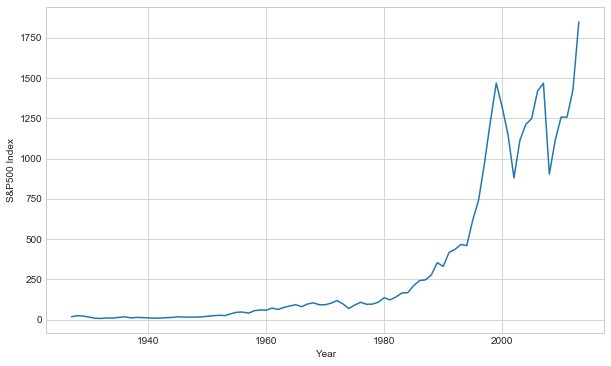

In [43]:
plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Index'])
plt.xlabel('Year')
plt.ylabel('S&P500 Index')

In [44]:
# Add the change in log column to the table
df['log_Index'] = np.log(df['Index'])

In [45]:
df.head()

,Year,Index,Dividends,Riskfree,LogEqPrem,BookMarket,NTIS,DivPrice,EarnPrice,Inflation,log_Index
0,1927,17.66,0.77,0.0317,0.280823,0.374689,0.073955,-3.132667,-2.766942,-0.021176,2.871302
1,1928,24.35,0.85,0.0426,0.313824,0.259667,0.042639,-3.355051,-2.870448,-0.009793,3.192532
2,1929,21.45,0.97,0.0303,-0.112428,0.338458,0.165576,-3.096184,-2.589490,0.001830,3.065725
3,1930,15.34,0.98,0.0148,-0.288025,0.554745,0.131525,-2.750667,-2.760923,-0.060665,2.730464
4,1931,8.12,0.82,0.0241,-0.563742,1.170732,-0.011032,-2.292781,-2.588626,-0.095711,2.094330


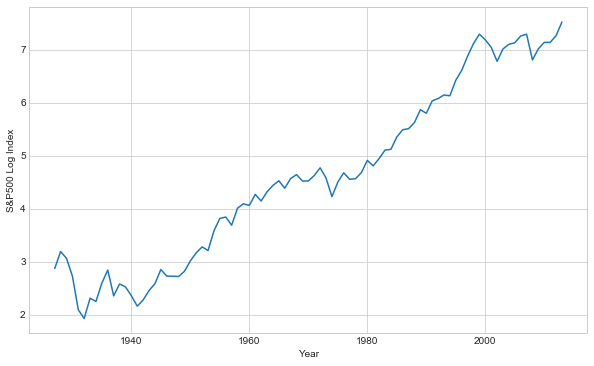

In [46]:
plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['log_Index'])
plt.xlabel('Year')
plt.ylabel('S&P500 Log Index')

In [47]:
diff = df['log_Index'].diff()

In [48]:
df['log_diff'] = diff

In [49]:
df.head()

,Year,Index,Dividends,Riskfree,LogEqPrem,BookMarket,NTIS,DivPrice,EarnPrice,Inflation,log_Index,log_diff
0,1927,17.66,0.77,0.0317,0.280823,0.374689,0.073955,-3.132667,-2.766942,-0.021176,2.871302,NaN
1,1928,24.35,0.85,0.0426,0.313824,0.259667,0.042639,-3.355051,-2.870448,-0.009793,3.192532,0.321230
2,1929,21.45,0.97,0.0303,-0.112428,0.338458,0.165576,-3.096184,-2.589490,0.001830,3.065725,-0.126807
3,1930,15.34,0.98,0.0148,-0.288025,0.554745,0.131525,-2.750667,-2.760923,-0.060665,2.730464,-0.335261
4,1931,8.12,0.82,0.0241,-0.563742,1.170732,-0.011032,-2.292781,-2.588626,-0.095711,2.094330,-0.636134


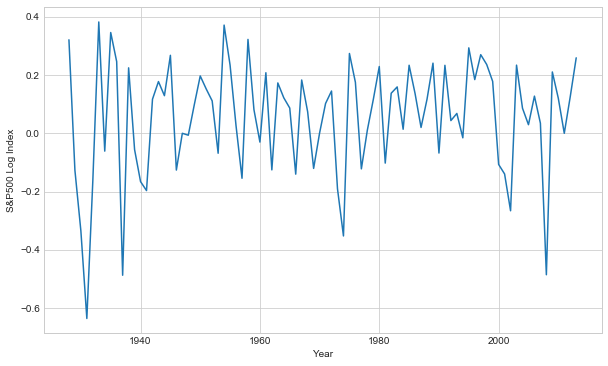

In [50]:
plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['log_diff'])
plt.xlabel('Year')
plt.ylabel('S&P500 Log Index')

In [51]:
df['BookMarket_2'] = df['BookMarket']**2

In [52]:
df.head()

,Year,Index,Dividends,Riskfree,LogEqPrem,BookMarket,NTIS,DivPrice,EarnPrice,Inflation,log_Index,log_diff,BookMarket_2
0,1927,17.66,0.77,0.0317,0.280823,0.374689,0.073955,-3.132667,-2.766942,-0.021176,2.871302,NaN,0.140392
1,1928,24.35,0.85,0.0426,0.313824,0.259667,0.042639,-3.355051,-2.870448,-0.009793,3.192532,0.321230,0.067427
2,1929,21.45,0.97,0.0303,-0.112428,0.338458,0.165576,-3.096184,-2.589490,0.001830,3.065725,-0.126807,0.114554
3,1930,15.34,0.98,0.0148,-0.288025,0.554745,0.131525,-2.750667,-2.760923,-0.060665,2.730464,-0.335261,0.307742
4,1931,8.12,0.82,0.0241,-0.563742,1.170732,-0.011032,-2.292781,-2.588626,-0.095711,2.094330,-0.636134,1.370613


In [53]:
import statsmodels.api as sm

In [54]:
X = pd.concat([df['BookMarket'], df['BookMarket_2']], axis=1)
y = df['log_diff']
X = X[1:]
y = y[1:]
X = sm.add_constant(X)

In [55]:
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_diff   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     5.050
Date:                Fri, 06 Apr 2018   Prob (F-statistic):            0.00852
Time:                        21:50:25   Log-Likelihood:                 22.599
No. Observations:                  86   AIC:                            -39.20
Df Residuals:                      83   BIC:                            -31.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0563      0.089      0.633      0.528      -0.121       0.233
BookMarket       0.2368      0.287      0.825      0.412      -0.334       0.808
BookMarket_2    -0.3467      0.213     -1.630      0.107      -0.770       0.076
==============================================================================
Omnibus:                       12.262   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.826
Skew:                          -0.856   Prob(JB):                      0.00164
Kurtosis:                       3.804   Cond. No.                         22.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the t-value associated with the coefficient of `squared BookMarket` is low, the relationship between `index` and `Bookmarket` is not quadratic.

In [56]:
df['dummy_year'] = (df['Year'] >= 1980).astype(int)

In [57]:
df.head()

,Year,Index,Dividends,Riskfree,LogEqPrem,BookMarket,NTIS,DivPrice,EarnPrice,Inflation,log_Index,log_diff,BookMarket_2,dummy_year
0,1927,17.66,0.77,0.0317,0.280823,0.374689,0.073955,-3.132667,-2.766942,-0.021176,2.871302,NaN,0.140392,0
1,1928,24.35,0.85,0.0426,0.313824,0.259667,0.042639,-3.355051,-2.870448,-0.009793,3.192532,0.321230,0.067427,0
2,1929,21.45,0.97,0.0303,-0.112428,0.338458,0.165576,-3.096184,-2.589490,0.001830,3.065725,-0.126807,0.114554,0
3,1930,15.34,0.98,0.0148,-0.288025,0.554745,0.131525,-2.750667,-2.760923,-0.060665,2.730464,-0.335261,0.307742,0
4,1931,8.12,0.82,0.0241,-0.563742,1.170732,-0.011032,-2.292781,-2.588626,-0.095711,2.094330,-0.636134,1.370613,0


In [58]:
df['interaction'] = df['BookMarket']*df['dummy_year']

In [59]:
X = pd.concat([df['BookMarket'], df['interaction']], axis=1)
y = df['log_diff']
X = X[1:]
y = y[1:]
X = sm.add_constant(X)

In [60]:
model2 = sm.OLS(y, X).fit() ## sm.OLS(output, input)

# Print out the statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_diff   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     3.778
Date:                Fri, 06 Apr 2018   Prob (F-statistic):             0.0269
Time:                        21:54:12   Log-Likelihood:                 21.408
No. Observations:                  86   AIC:                            -36.82
Df Residuals:                      83   BIC:                            -29.45
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1661      0.054      3.094      0.003       0.059       0.273
BookMarket     -0.2079      0.080     -2.603      0.011      -0.367      -0.049
interaction     0.0486      0.086      0.563      0.575      -0.123       0.220
==============================================================================
Omnibus:                       12.842   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.822
Skew:                          -0.846   Prob(JB):                     0.000997
Kurtosis:                       3.999   Cond. No.                         5.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""